# cleanup the runs

In [1]:
folder = 'logs'

# Recreate action

In [55]:
from TD3 import *

def recreate_action(df):
    
    # init agent
    agent = TD3(state_dim=4, action_dim=1)
    agent.load('142') # in same folder as this script
    
    actions = []
    
    for i, _ in enumerate(df['loop_timer']):
        
        x_target = df['x_target'][i]
        position = df['position'][i]
        acceleration = df['acceleration'][i]
        pressure = df['pressure'][i]
        
        state = np.array([x_target,position,acceleration,pressure]) # [x_target, x, a, p_actual]
        action = agent.select_action(state)
        action = map(action, -1, 1, 0, 4095)
        action = int(action)

        # map back to bar
        action = map(action, 0, 4095, 0, 10)
        actions.append(action)

    df['action'] = np.array(actions)
    return df

## Run 1

In [67]:
# run 1 - pressure was not mapped
name = 'logs_2024_01_25_-_15_18_56'
file = f'./{folder}/{name}.txt'
df = pd.read_csv(file)
df = recreate_action(df) # recreate action with unmapped pressure

# Mapping function
def map_pressure(pressure):
    return (pressure - 0) * (10 - 0) / (4095 - 0) + 0

# Applying mapping function to the 'pressure' column
df['pressure'] = df['pressure'].apply(map_pressure)

df.to_csv(f'{folder}/run1.csv', index=False)
df

C:\Users\svens\AppData\Local\Temp\ipykernel_9232\398778175.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  action = int(action)


,counter,loop_timer,x_target,teensy_time,acceleration,position,pressure,action
0,0,1.706192e+09,1.000000,38180,-0.08665,0.00,-0.002442,9.262515
1,0,1.706192e+09,1.000000,38195,-0.12665,0.00,-0.004884,9.250305
2,0,1.706192e+09,1.000000,38210,-0.00665,0.00,0.000000,9.421245
3,12509,1.706192e+09,0.993333,38225,-0.14665,0.00,-0.002442,9.228327
4,29659,1.706192e+09,0.986667,38240,-0.07665,0.00,0.000000,9.382173
...,...,...,...,...,...,...,...,...
293,9392764,1.706192e+09,0.000000,42616,-0.53665,1.90,6.412698,10.000000
294,9439192,1.706192e+09,0.000000,42631,0.89335,1.90,6.412698,10.000000
295,9480078,1.706192e+09,0.000000,42646,-2.68665,1.90,6.415140,10.000000
296,9519694,1.706192e+09,0.000000,42661,-2.03665,1.91,6.412698,10.000000


## Run 2 .. 4

In [58]:
# run 2 to 4 - mapping was correct
names = ['logs_2024_01_25_-_15_24_03','logs_2024_01_25_-_15_30_25','logs_2024_01_25_-_15_30_55']

for i, name in enumerate(names):
    file = f'./{folder}/{name}.txt'
    df = pd.read_csv(file)
    df = recreate_action(df)
    df.to_csv(f'{folder}/run{i+2}.csv', index=False)

C:\Users\svens\AppData\Local\Temp\ipykernel_9232\398778175.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  action = int(action)
C:\Users\svens\AppData\Local\Temp\ipykernel_9232\398778175.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  action = int(action)
C:\Users\svens\AppData\Local\Temp\ipykernel_9232\398778175.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  action = int(action)


# Plot the raw runs


                                            RUN 1
    


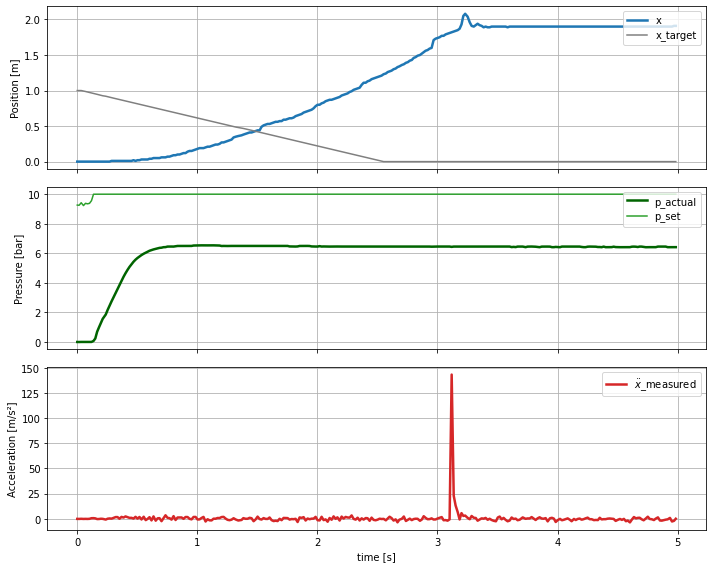


                                            RUN 2
    


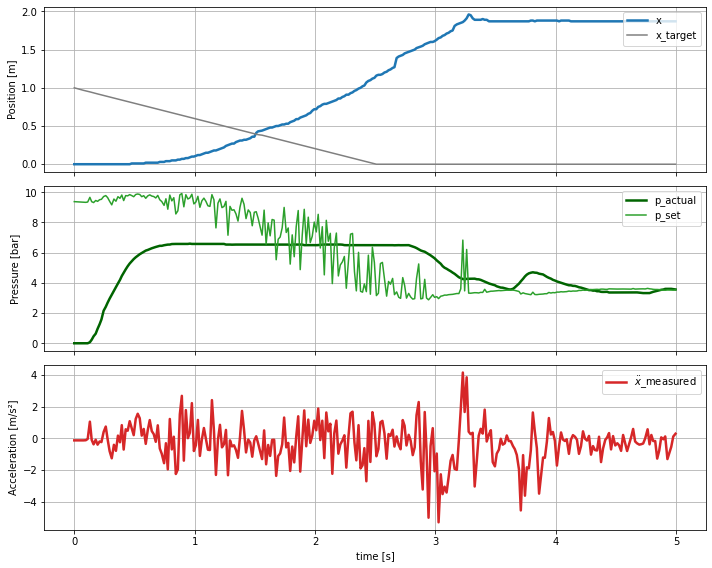


                                            RUN 3
    


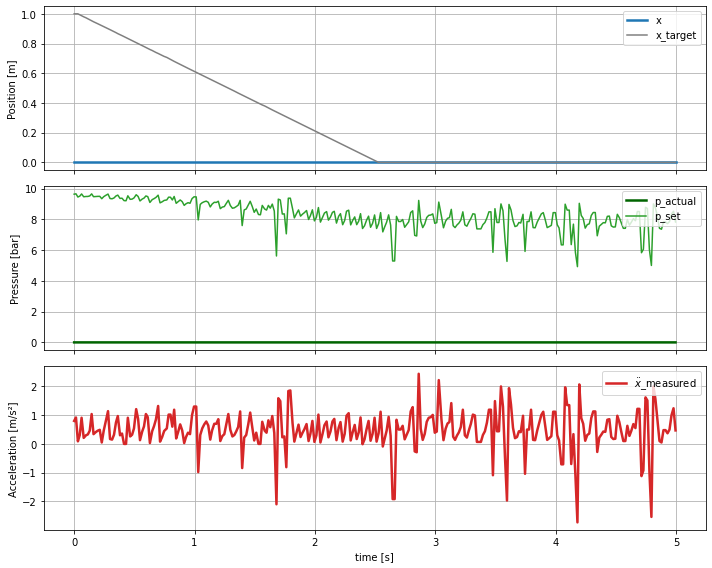


                                            RUN 4
    


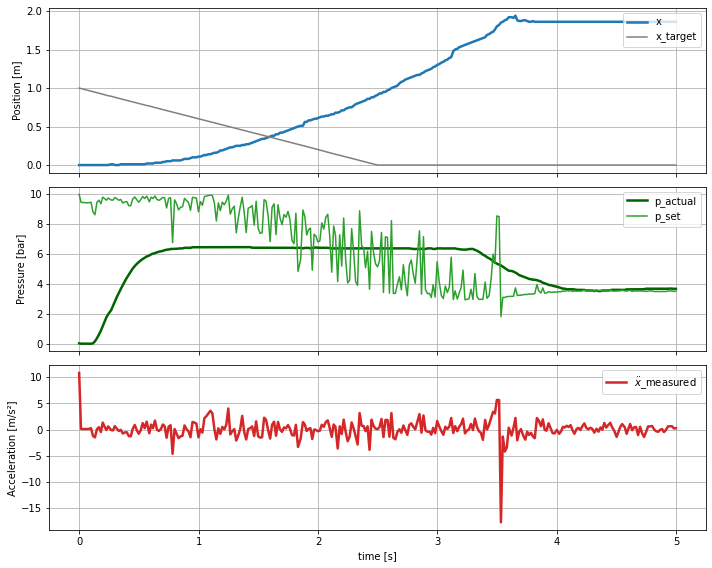

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

folder = 'logs'
runs = ['run1','run2','run3','run4']
file_type = 'csv'


def plot_columns(df,i):
    fig, axes = plt.subplots(3, 1, figsize=(10, 8))

    timestamps = np.array(df['loop_timer'])
    time = (timestamps - timestamps[0]) 
    
    # Plot position
    axes[0].plot(time, np.array(df['position']),label='x',linewidth=2.5)
    axes[0].plot(time, np.array(df['x_target']),label='x_target',color="tab:grey")
    #axes[0].set_title('Position')
    #axes[0].set_xlabel('time [s]')
    axes[0].set_ylabel('Position [m]')
    axes[0].legend(loc='upper right')
    axes[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    axes[0].grid(True)

    # Plot pressure
    axes[1].plot(time, np.array(df['pressure']),label='p_actual',color="darkgreen",linewidth=2.5)
    axes[1].plot(time, np.array(df['action']),label='p_set',color="tab:green",linewidth=1.5)
    #axes[1].set_title('Pressure')
    axes[1].set_ylabel('Pressure [bar]')
    axes[1].legend(loc='upper right')
    axes[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    axes[1].grid(True)

    # Plot acceleration
    axes[2].plot(time, np.array(df['acceleration']),label='$\ddot{x}$_measured',color="tab:red",linewidth=2.5)
    #axes[2].set_title('Acceleration')
    #axes[2].set_xlabel('time [s]')
    axes[2].set_ylabel('Acceleration [m/s²]')
    axes[2].legend(loc='upper right')
    axes[2].set_xlabel('time [s]')
    axes[2].grid(True)

    plt.tight_layout()
    plt.savefig(f'img/run{i}.png', bbox_inches='tight', dpi= 300, facecolor='white')
    plt.show()


for i , run in enumerate(runs):
    # Replace 'data.csv' with the actual path to your CSV file
    file = f'./{folder}/{run}.{file_type}'
    
    # Load CSV into a Pandas DataFrame
    df = pd.read_csv(file)
    print(f'''
    ==========================================================================================
                                            RUN {i+1}
    ==========================================================================================
    ''')
    plot_columns(df,i+1)

# Simulate Full Throttle

In [6]:
from hopperenv import *
from TD3 import *

PyTorch version: 2.1.1+cpu
NumPy version: 1.26.2
Gym version: 0.26.2
Job will run on cpu


C:\Users\svens\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [7]:
def full_throttle(logging=True):

    all_test_reward = 0
    test_iteration=1
    ep_r = 0

    env.reset()
    MAX_TIME_STEPS = int(env.sim_time / env.tn)+1 + 600
    
    logs = []

    for i in range(test_iteration):
        state = env.reset()
        
        log = np.zeros((9,MAX_TIME_STEPS))
        
        for t in range(MAX_TIME_STEPS):

            action = 7

            y, reward, done, info = env.step(action)
            
            a_actual = y[2]
            #y[2] += random.gauss(0, 1) # apply noise


            if logging:
                
                log[0,t] = y[1] # x
                log[1,t] = info[1] # v
                log[2,t] = y[2] # a
                log[3,t] = action # p_set
                log[4,t] = info[0] # p_actual
                log[5,t] = y[0] # x_target
                log[6,t] = y[1] - y[0] # error
                log[7,t] = reward # reward
                log[8,t] = a_actual # no noise acceleration
            
            ep_r += reward

            if t >= 300:
                env.x_target = max(0,env.x_target - (2/300))               

            state = y
            
        all_test_reward += ep_r
        ep_r = 0
        logs.append(log)
    
    score = all_test_reward/test_iteration      
    #print(f'final test score: {score:0.2f}                                                                        ')
    
    env.close()
    if logging:
        return logs
    else:
        return score  

In [8]:
logs = full_throttle()

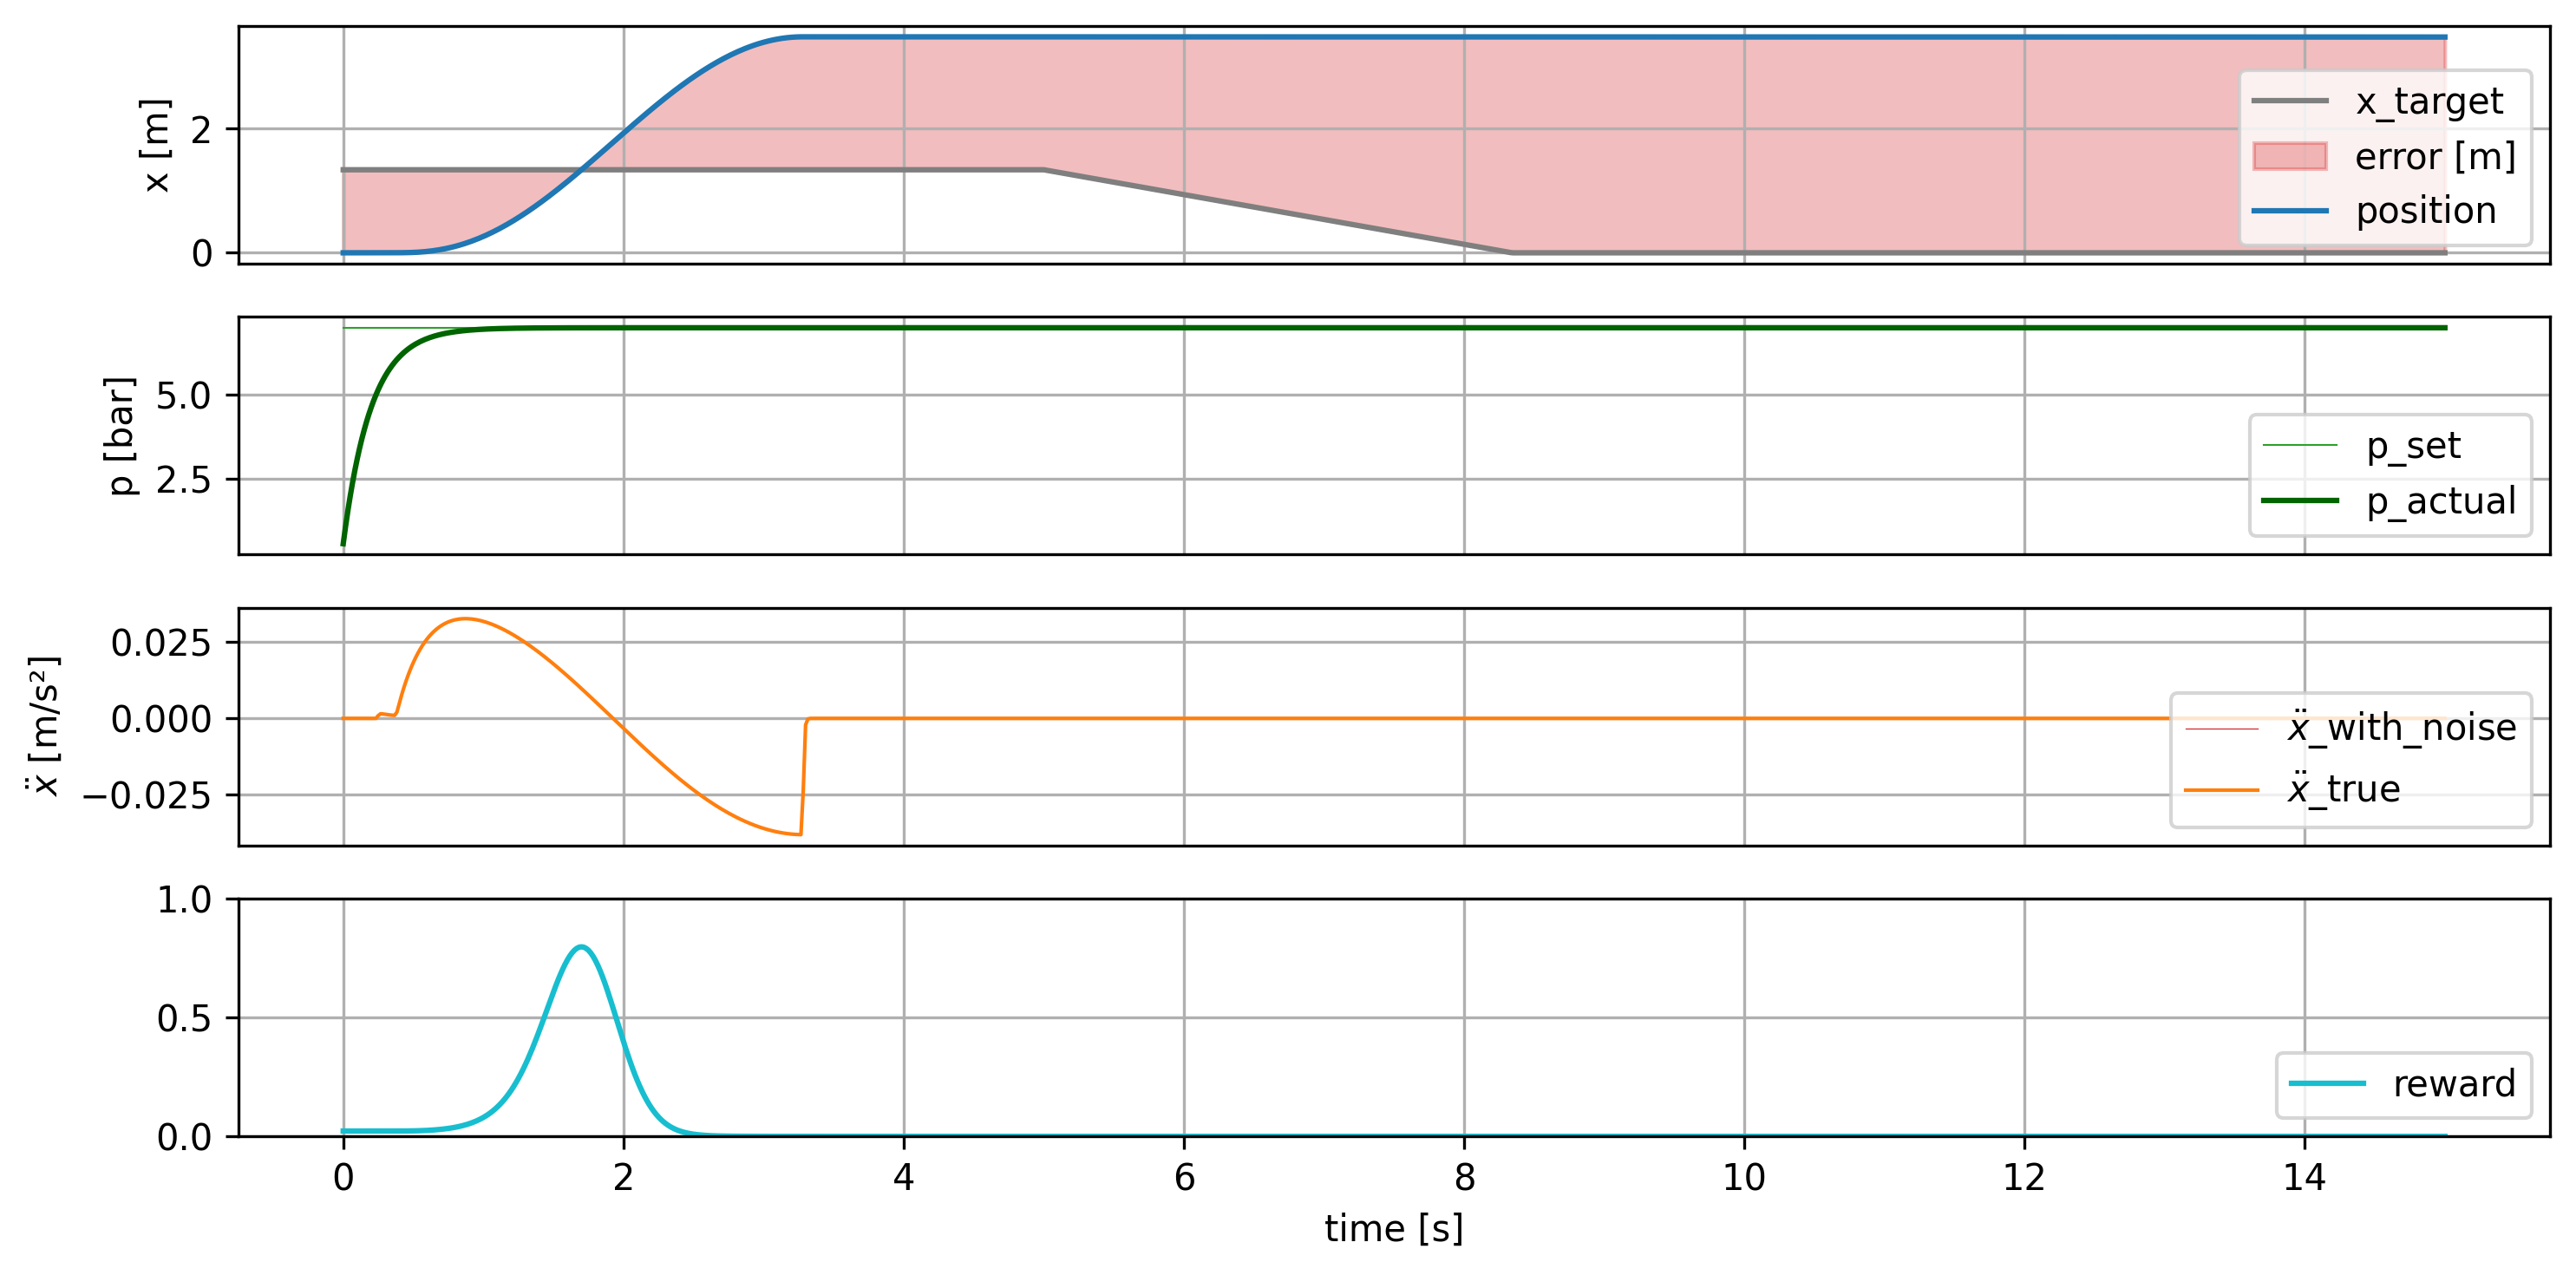

In [59]:
plot_doc(logs[0],f'img/sim/full_throttle.jpg',linewidth=1,linestyle='solid')

In [9]:
# load run 1 df
file = f'./{folder}/run1.{file_type}'
df = pd.read_csv(file)

In [10]:
df

,counter,loop_timer,x_target,teensy_time,acceleration,position,pressure,action
0,0,1.706192e+09,1.000000,38180,-0.08665,0.00,-0.002442,9.262515
1,0,1.706192e+09,1.000000,38195,-0.12665,0.00,-0.004884,9.250305
2,0,1.706192e+09,1.000000,38210,-0.00665,0.00,0.000000,9.421245
3,12509,1.706192e+09,0.993333,38225,-0.14665,0.00,-0.002442,9.228327
4,29659,1.706192e+09,0.986667,38240,-0.07665,0.00,0.000000,9.382173
...,...,...,...,...,...,...,...,...
293,9392764,1.706192e+09,0.000000,42616,-0.53665,1.90,6.412698,10.000000
294,9439192,1.706192e+09,0.000000,42631,0.89335,1.90,6.412698,10.000000
295,9480078,1.706192e+09,0.000000,42646,-2.68665,1.90,6.415140,10.000000
296,9519694,1.706192e+09,0.000000,42661,-2.03665,1.91,6.412698,10.000000


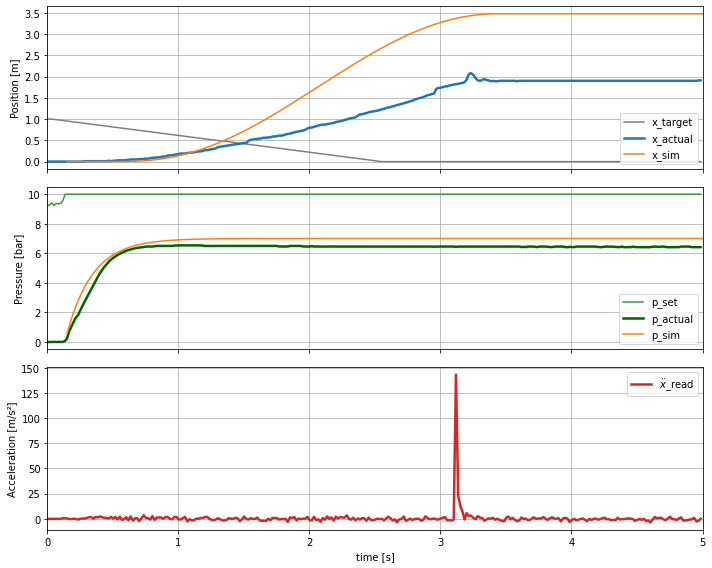

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

offset = 0.15
states = logs[0]
time_sim = np.arange(states.shape[1]) * (1/60) + offset

timestamps = np.array(df['loop_timer'])
time = (timestamps - timestamps[0]) 

# Plot position
axes[0].plot(time, np.array(df['x_target']),label='x_target',color="tab:grey")
axes[0].plot(time, np.array(df['position']),label='x_actual',linewidth=2.5)
axes[0].plot(time_sim, states[0, :], label="x_sim",color='tab:orange') # x
#axes[0].set_title('Position')
#axes[0].set_xlabel('time [s]')
axes[0].set_ylabel('Position [m]')
axes[0].legend(loc='lower right')
axes[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
axes[0].set_xlim(0,5)
axes[0].grid(True)

# Plot pressure
axes[1].plot(time, np.array(df['action']),label='p_set',color="tab:green",linewidth=1.5)
axes[1].plot(time, np.array(df['pressure']),label='p_actual',color="darkgreen",linewidth=2.5)
axes[1].plot(time_sim, states[4, :], label="p_sim",color='tab:orange')
#axes[1].set_title('Pressure')
axes[1].set_ylabel('Pressure [bar]')
axes[1].legend(loc='lower right')
axes[1].set_xlim(0,5)
axes[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
axes[1].grid(True)

# Plot acceleration
axes[2].plot(time, np.array(df['acceleration']),label='$\ddot{x}$_read',color="tab:red",linewidth=2.5)
#axes[2].set_title('Acceleration')
#axes[2].set_xlabel('time [s]')
axes[2].set_ylabel('Acceleration [m/s²]')
axes[2].legend(loc='upper right')
axes[2].set_xlabel('time [s]')
axes[2].set_xlim(0,5)
axes[2].grid(True)

plt.tight_layout()
plt.savefig('img/run1_sim.png', bbox_inches='tight', dpi= 300, facecolor='white')
plt.show()

## Determine Noise from Run 3

In [16]:
# load run 3 df
file = f'./{folder}/run3.{file_type}'
df = pd.read_csv(file)
df

,counter,loop_timer,x_target,teensy_time,acceleration,position,pressure,action
0,0,1.706193e+09,1.000000,14656,0.79665,0,0.0,9.638584
1,0,1.706193e+09,1.000000,14671,0.91665,0,0.0,9.663004
2,0,1.706193e+09,1.000000,14686,0.08665,0,0.0,9.452991
3,6335,1.706193e+09,0.993333,14701,0.30665,0,0.0,9.511600
4,12933,1.706193e+09,0.986667,14716,0.90665,0,0.0,9.653236
...,...,...,...,...,...,...,...,...
296,11382680,1.706193e+09,0.000000,19137,0.36665,0,0.0,7.721612
297,11423976,1.706193e+09,0.000000,19152,0.49665,0,0.0,7.860806
298,11457218,1.706193e+09,0.000000,19167,0.99665,0,0.0,8.349206
299,11500398,1.706193e+09,0.000000,19182,1.23665,0,0.0,8.527473


Standard Deviation: 0.6672303351384116
Mean Absolute Deviation (MAD): 0.44740013907131276
Root Mean Square (RMS) Error: 0.8254955241391402
Maximum Value: 2.43665
Minimum Value: -2.73335
Average: 0.48605199335548116


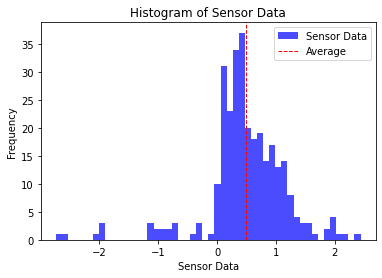

In [21]:
acc = df['acceleration']


std_dev = np.std(acc)
print("Standard Deviation:", std_dev)

mad = np.mean(np.abs(acc - np.mean(acc)))
print("Mean Absolute Deviation (MAD):", mad)

rms_error = np.sqrt(np.mean(np.square(acc)))
print("Root Mean Square (RMS) Error:", rms_error)

max_value = np.max(acc)
min_value = np.min(acc)
print("Maximum Value:", max_value)
print("Minimum Value:", min_value)

# Compute the average
average = np.mean(acc)
print('Average:',average)

# Plot histogram of sensor data
plt.hist(acc, bins=50, alpha=0.7, color='blue', label='Sensor Data')
plt.axvline(average, color='red', linestyle='dashed', linewidth=1, label='Average')
plt.xlabel('Sensor Data')
plt.ylabel('Frequency')
plt.title('Histogram of Sensor Data')
plt.legend()

# Show plot
plt.show()